# Introduction
- Goal: Segment customers based on their demographic and spending data.
- Techniques Used: Clustering algorithms (K-Means , DBSCAN , Hierarchical ) and evaluation using Silhouette Score.
- the Dataset used in this project can be found at : https://www.kaggle.com/datasets/shrutimechlearn/customer-data

# Importing Libraries
- Pandas and NumPy for data manipulation
- Matplotlib for data visualization
- Sklearn for preprocessing, clustering, and evaluation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN , KMeans , AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

In [15]:
np.random.seed(0)

# Data reading

In [18]:
df = pd.read_csv("E:\Learning\Machine learning\Projects\CustomerClustering\CostumerDataset.csv")
df.head(9)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3


In [20]:
print(df.info())
print(df.shape)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Data Preprocessing
- Label Encoding: The categorical variable Gender is converted into numerical form
- Standardization: Features like Age, Annual Income, and Spending Score are scaled using StandardScaler to give them equal weight.

In [23]:
pdf  = df.copy()
pdf = pdf.drop("CustomerID" , axis='columns')
encoder = preprocessing.LabelEncoder()
scaler = preprocessing.StandardScaler()
pdf["Gender"]=encoder.fit_transform(pdf["Gender"])
X = scaler.fit_transform(pdf.drop("Gender" , axis = "columns"))
X

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [25]:
pdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


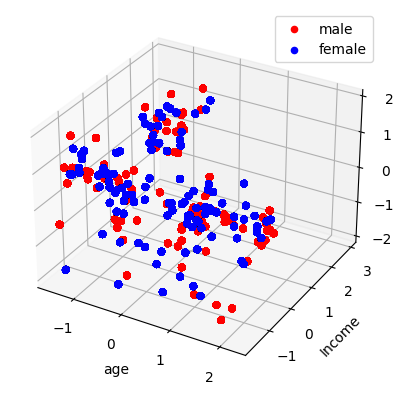

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mask = pdf["Gender"]==1
for _ in range(pdf.shape[0]):
    ax.scatter(X[mask , 0] , X[mask , 1] , X[mask ,2] , color = "r"  )
    ax.scatter(X[~mask , 0] , X[~mask , 1] , X[~mask ,2] , color = "b" )
ax.legend(["male" , "female"])
ax.set_xlabel("age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
plt.show()

# K-Means Clustering
first using elbow method to find the best number of clusters(K)

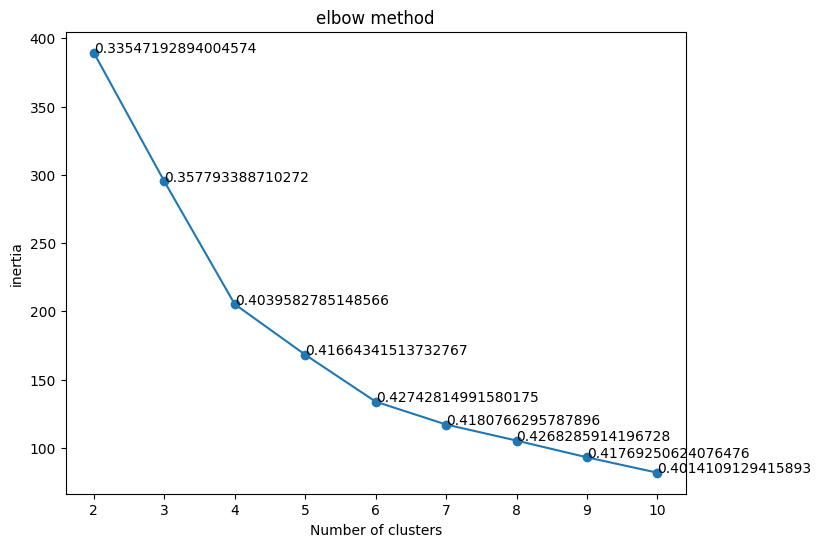

In [29]:
plt.figure(figsize = (8 , 6))
inertia = list()
silhouette = list()
for i in range(2 , 11):
    kmeans = KMeans(n_clusters = i , init='k-means++', n_init=12)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))
    x = i-2
    plt.text( i , inertia[x] , str(silhouette[x]) )
plt.plot(range(2 , 11) ,  inertia , marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel("inertia")
plt.title("elbow method")
plt.show()


- Clustering: The number of clusters is set to 4
- Evaluation: The Silhouette Score is calculated to measure how well the clusters are separated.

In [33]:
clusterNum = 4
kmeans = KMeans(n_clusters = clusterNum , init='k-means++', n_init=12)
kmeans.fit(X)
kLabels = kmeans.labels_
kLabels

array([0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 1, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [35]:
pdf["kCluster"]=kLabels
pdf.head(9)

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
5,0,22,17,76,0
6,0,35,18,6,3
7,0,23,18,94,0
8,1,64,19,3,3


In [37]:
km = pdf.groupby("kCluster").mean()
km

,Gender,Age,Annual Income (k$),Spending Score (1-100)
kCluster,,,,
0,0.403509,25.438596,40.000000,60.298246
1,0.500000,39.368421,86.500000,19.578947
2,0.450000,32.875000,86.100000,81.525000
3,0.430769,53.984615,47.707692,39.969231


In [39]:
pdf.groupby("kCluster").count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
kCluster,,,,
0,57,57,57,57
1,38,38,38,38
2,40,40,40,40
3,65,65,65,65


- Scatter Plots show customer segmentation
- The results are color-coded based on clusters

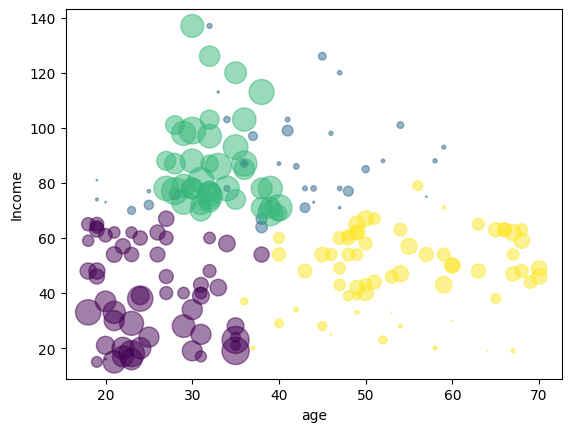

In [42]:
area = np.pi * ( pdf["Spending Score (1-100)"])**2
plt.scatter(pdf["Age"] , pdf["Annual Income (k$)"] , s = area/80 , c = kLabels.astype(float) , alpha = 0.5)
plt.xlabel("age")
plt.ylabel("Income")
plt.show()

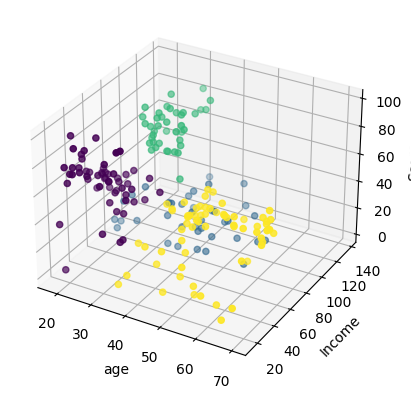

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(pdf["Age"] , pdf["Annual Income (k$)"] , pdf["Spending Score (1-100)"] , c = kLabels.astype(float))
ax.set_xlabel("age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
plt.show()

In [46]:
kScore = silhouette_score(X, kLabels)
print(f"kmeans score : {kScore}")

kmeans score : 0.4039582785148566


# Hierarchical Clustering

In [49]:
dist_matrix = euclidean_distances(X , X)
dist_matrix

array([[0.        , 1.63681098, 1.28368768, ..., 4.54611614, 4.81867651,
        5.02250496],
       [1.63681098, 0.        , 2.91275149, ..., 4.3182849 , 5.31878915,
        4.70189264],
       [1.28368768, 2.91275149, 0.        , ..., 5.03379713, 4.72114828,
        5.54808733],
       ...,
       [4.54611614, 4.3182849 , 5.03379713, ..., 0.        , 2.21418015,
        0.5647686 ],
       [4.81867651, 5.31878915, 4.72114828, ..., 2.21418015, 0.        ,
        2.5274803 ],
       [5.02250496, 4.70189264, 5.54808733, ..., 0.5647686 , 2.5274803 ,
        0.        ]])

- A dendrogram is created using the linkage function with  (single , complete , centroid , weighted ,average) methods to visualize how hierarchical clusters are formed
- The dendrogram shows the merging process of clusters and helps determine the optimal number of clusters

C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\3836470325.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix , l)


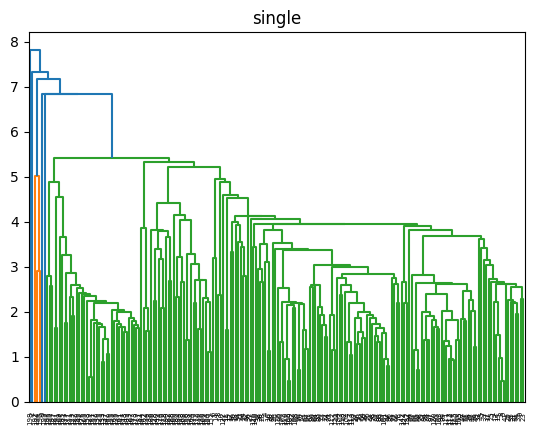

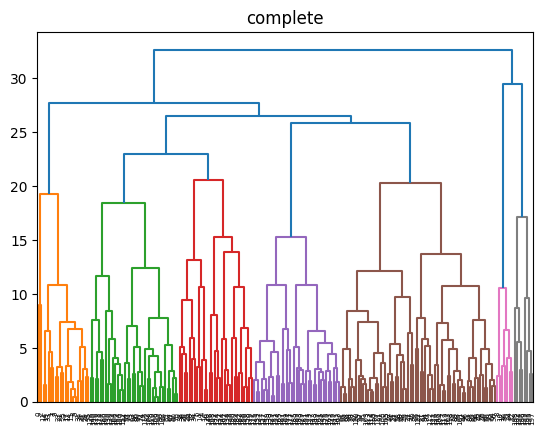

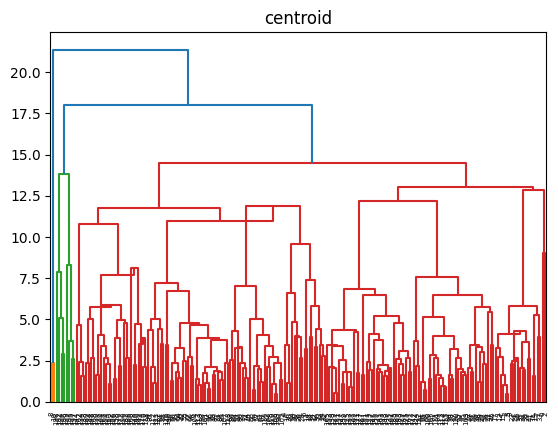

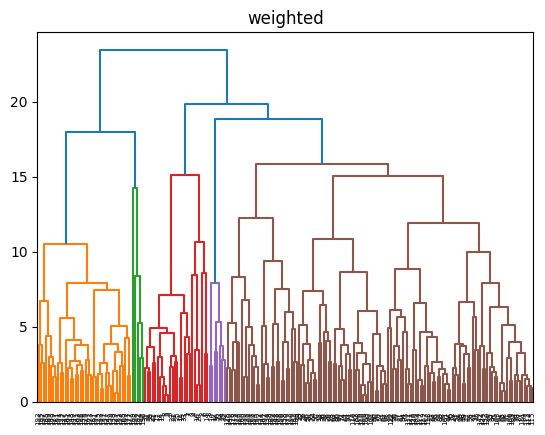

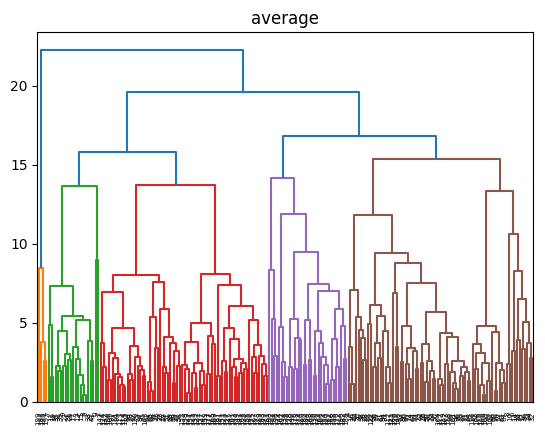

In [52]:
linkage = ["single" , "complete" , "centroid" , "weighted" ,"average" ]
for l in linkage:
    Z = hierarchy.linkage(dist_matrix , l)
    dendro=hierarchy.dendrogram(Z)
    plt.title(l)
    plt.show()

In [53]:
Z = hierarchy.linkage(dist_matrix , "average")

C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\2176041325.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix , "average")


In [54]:
k = 4
clusters = hierarchy.fcluster(Z , k , criterion = "maxclust")
clusters

array([2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [58]:
print(silhouette_score(X, clusters))

0.2993572767622218


- The number of clusters is set to 4 using agglomerative (bottom-up) clustering
- Silhouette Score is computed to evaluate the cluster quality

In [106]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = "average")
agglom.fit(dist_matrix)
hLabels = agglom.labels_
hLabels

E:\app\Programming\python\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [63]:
pdf["hCluster"]=hLabels
pdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster,hCluster
0,1,19,15,39,0,0
1,1,21,15,81,0,0
2,0,20,16,6,0,0
3,0,23,16,77,0,0
4,0,31,17,40,0,2


- Scatter Plots show customer segmentation
- The results are color-coded based on clusters

C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\1298238316.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], s = area/80 , c = color , label = "cluster"+str(label), alpha = 0.5)
C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\1298238316.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], s = a

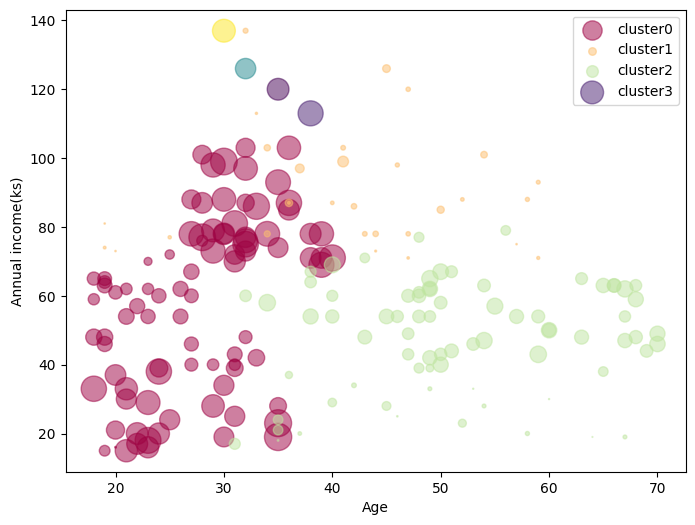

In [66]:
import matplotlib.cm as cm
plt.figure(figsize =(8 , 6))
n_cluster = max(hLabels)+1
colors = cm.Spectral(np.linspace(0 , 1 , n_cluster))
c_labels = list(set(hLabels))

for color ,  label in zip(colors , c_labels):
    subset = pdf[pdf.hCluster == label]
    area = np.pi * ( subset["Spending Score (1-100)"])**2
    plt.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], s = area/80 , c = color , label = "cluster"+str(label), alpha = 0.5)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual income(ks)")
plt.show()

In [68]:
pdf.groupby("hCluster").count()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster
hCluster,,,,,
0,89,89,89,89,89
1,32,32,32,32,32
2,75,75,75,75,75
3,4,4,4,4,4


In [70]:
m = pdf.groupby("hCluster").mean()
m

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster
hCluster,,,,,
0,0.415730,27.651685,57.786517,69.089888,0.820225
1,0.562500,41.000000,89.406250,15.593750,1.062500
2,0.413333,51.493333,48.160000,40.866667,2.640000
3,0.500000,33.750000,124.000000,81.750000,2.000000


C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\1651195747.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], subset[["Spending Score (1-100)"]] , c = color , label = "cluster"+str(label), alpha = 0.5)
C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\1651195747.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset[["Age"]] , subset[["Annual In

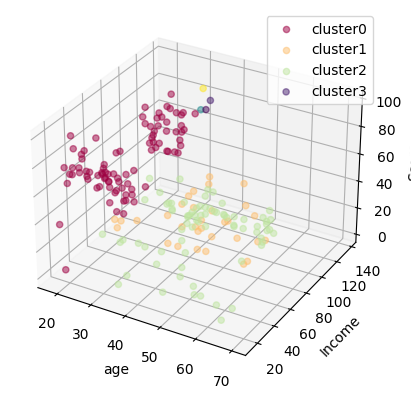

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
for color ,  label in zip(colors , c_labels):
    subset = pdf[pdf.hCluster == label]
    ax.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], subset[["Spending Score (1-100)"]] , c = color , label = "cluster"+str(label), alpha = 0.5)
plt.legend()
ax.set_xlabel("age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
plt.show()

In [74]:
hScore = silhouette_score(X, hLabels)
print(f"hierarchical score : {hScore}")

hierarchical score : 0.2993572767622218


# DBSCAN Clustering

first we plot the K-Distance Graph, which helps to select an optimal value for the eps parameter in DBSCAN

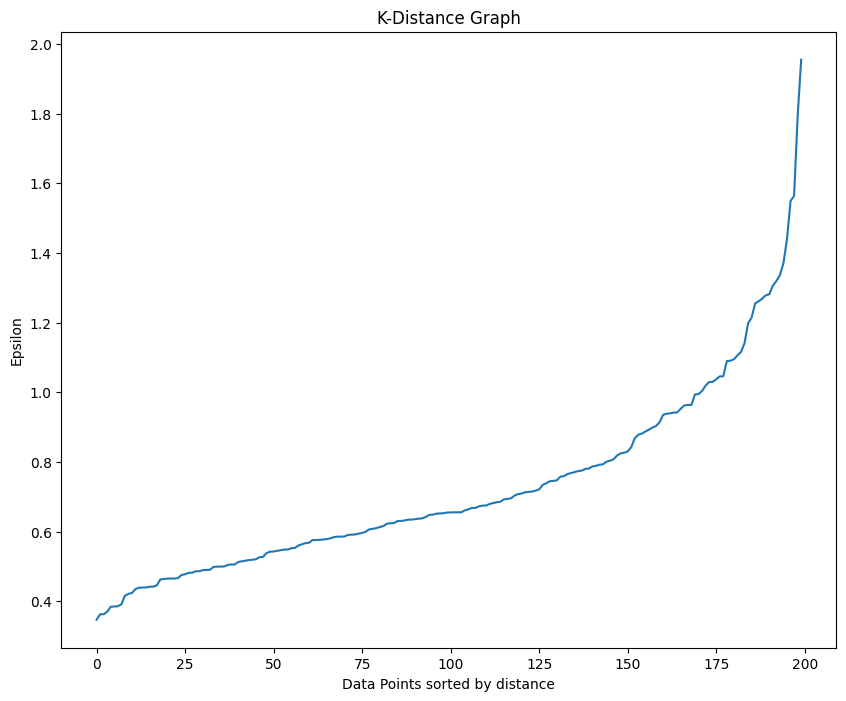

In [78]:
neighbors = NearestNeighbors(n_neighbors = 10)
neighbors_fit = neighbors.fit(X)
distance , indices = neighbors_fit.kneighbors(X)
distance = np.sort(distance , axis = 0)
distance = distance[:, 9]
plt.figure(figsize = (10 , 8))
plt.plot(distance)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('K-Distance Graph')
plt.show()

In [80]:
silhouette = {}
for e in np.arange(0.4 , 2 , 0.05):
    epsilon = e
    minimumSamples = 10
    db = DBSCAN(eps = epsilon , min_samples = minimumSamples).fit(X)
    dLabels =db.labels_
    if len(set(dLabels)) - (1 if -1 in dLabels else 0)>1:
        silhouette_avg = silhouette_score(X , dLabels)
    else:
        silhouette_avg = 0
    silhouette[e]=silhouette_avg
silhouette

{0.4: -0.18631741401349877,
 0.45: -0.04087944272491985,
 0.5: 0.054361557577920744,
 0.55: 0.17998793920506956,
 0.6: 0.2904356073760902,
 0.6499999999999999: 0.17582583914360955,
 0.7: 0.12491266384758763,
 0.75: 0,
 0.7999999999999999: 0,
 0.8499999999999999: 0,
 0.8999999999999999: 0,
 0.9499999999999998: 0,
 0.9999999999999999: 0,
 1.0499999999999998: 0,
 1.0999999999999999: 0,
 1.15: 0,
 1.1999999999999997: 0,
 1.25: 0,
 1.2999999999999998: 0,
 1.3499999999999996: 0,
 1.4: 0,
 1.4499999999999997: 0,
 1.4999999999999996: 0,
 1.5499999999999998: 0,
 1.5999999999999996: 0,
 1.65: 0,
 1.6999999999999997: 0,
 1.7499999999999996: 0,
 1.7999999999999998: 0,
 1.8499999999999996: 0,
 1.8999999999999995: 0,
 1.9499999999999997: 0}

DBSCAN Clustering is applied using the eps value determined from the K-Distance Graph

In [83]:
epsilon = 0.6
minimumSamples = 10
db = DBSCAN(eps = epsilon , min_samples = minimumSamples).fit(X)
dLabels =db.labels_
dLabels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2, -1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2, -1, -1,  3,  2,  3,  1,  3, -1,  3, -1,  3,  2,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [85]:
core_sample_mask = np.zeros_like(dLabels , dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,

In [87]:
n_cluster = len(set(dLabels)) - (1 if -1 in dLabels else 0)
n_cluster

4

In [89]:
unique_labels = set(dLabels)
unique_labels

{-1, 0, 1, 2, 3}

- Scatter Plots show customer segmentation
- The results are color-coded based on clusters

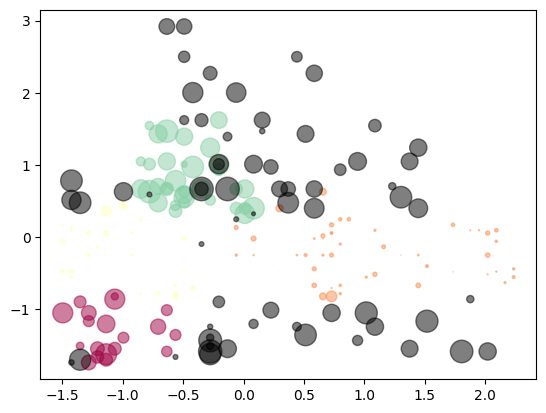

In [92]:
colors = cm.Spectral(np.linspace(0 , 1 , len(unique_labels)))
for l , col in zip(unique_labels , colors):
    if l ==-1:
        col = "k"
    class_member_mask = (dLabels==l)
    mask1 = X[class_member_mask & core_sample_mask]
    area1 = np.pi * mask1[: , 2]**2
    mask2 = X[class_member_mask & ~core_sample_mask]
    area2 = np.pi * mask2[: , 2]**2
    xy = X[class_member_mask & core_sample_mask]
    plt.scatter(xy[: , 0]  ,xy[: , 1] , s = area1*25 , c = [col] , marker = u"o" , alpha = 0.5)
    xy = X[class_member_mask & ~core_sample_mask]
    plt.scatter(xy[: , 0]  ,xy[: , 1] , s = area2*25 , c = [col] , marker = u"o" , alpha = 0.5)

In [94]:
pdf["dCluster"]=dLabels
pdf.groupby("dCluster").count()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster,hCluster
dCluster,,,,,,
-1,66,66,66,66,66,66
0,19,19,19,19,19,19
1,51,51,51,51,51,51
2,30,30,30,30,30,30
3,34,34,34,34,34,34


In [96]:
dm =pdf.groupby("dCluster").mean()
dm

,Gender,Age,Annual Income (k$),Spending Score (1-100),kCluster,hCluster
dCluster,,,,,,
-1,0.439394,41.257576,66.757576,27.318182,1.500000,1.363636
0,0.421053,23.736842,26.105263,78.315789,0.000000,0.000000
1,0.470588,54.078431,54.568627,48.196078,2.823529,2.000000
2,0.366667,24.333333,55.033333,49.466667,0.066667,0.066667
3,0.470588,32.588235,81.647059,82.558824,2.000000,0.000000


C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\161812790.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], subset[["Spending Score (1-100)"]] , c = col , label = "cluster"+str(l), alpha = 0.5)
C:\Users\Rayamin\AppData\Local\Temp\ipykernel_8684\161812790.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset[["Age"]] , subset[["Annual Income (k$

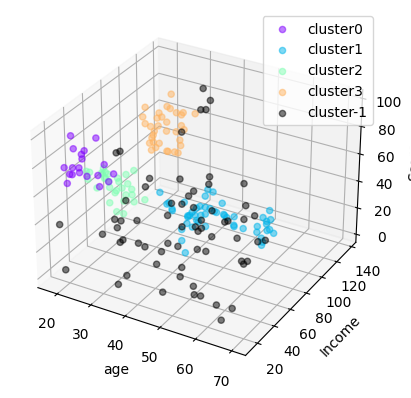

In [98]:
colors = cm.rainbow(np.linspace(0 , 1 , n_cluster+1))
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
for l , col in zip(unique_labels , colors):
    if l ==-1:
        col = "k"
    subset = pdf[pdf.dCluster == l]
    ax.scatter(subset[["Age"]] , subset[["Annual Income (k$)"]], subset[["Spending Score (1-100)"]] , c = col , label = "cluster"+str(l), alpha = 0.5)
plt.legend()
ax.set_xlabel("age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
plt.show()

In [100]:
dScore = silhouette_score(X , dLabels)
print(dScore)

0.2904356073760902


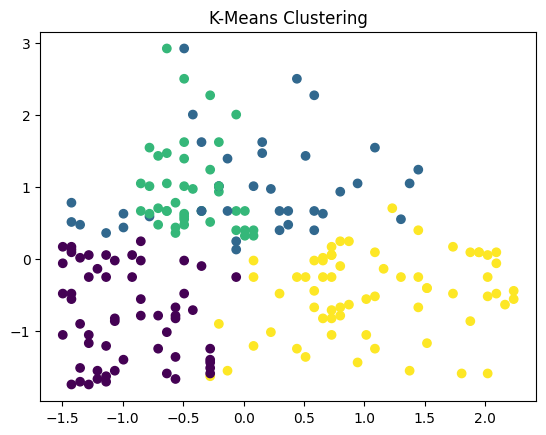

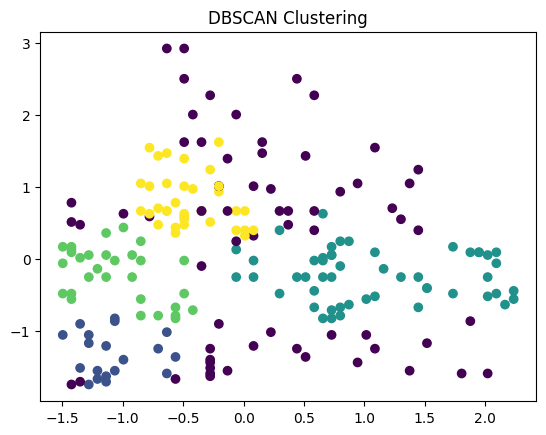

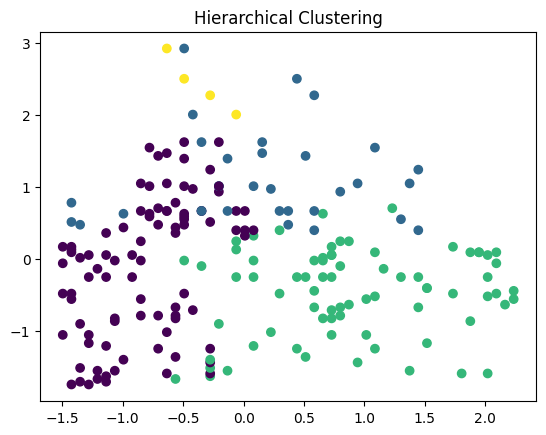

kmeans score : 0.4039582785148566
Hierarchical score : 0.2993572767622218
DBSCAN score : 0.2904356073760902


In [112]:
plt.scatter(X[:, 0], X[:, 1], c=kLabels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=dLabels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=hLabels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()


print(f"kmeans score : {kScore}")
print(f"Hierarchical score : {hScore}")
print(f"DBSCAN score : {dScore}")

# Conclusion
This project successfully demonstrates customer segmentation using three clustering algorithms: **K-Means**, **DBSCAN**, and **Hierarchical Clustering**. Each algorithm was applied to a dataset containing customer demographics and spending behavior, and their performance was evaluated using the **Silhouette Score**.

- **K-Means** clustering performed well with clearly defined groups and balanced clusters. It is a highly efficient algorithm for this kind of task but requires the number of clusters to be specified beforehand.
  
- **DBSCAN**, aided by the **K-Distance Graph** for choosing an optimal epsilon value, provided an effective way to identify outliers and denser clusters. While it excelled in detecting noise and non-spherical clusters, it was less effective for well-separated, homogeneous data points compared to K-Means.

- **Hierarchical Clustering** provided an additional view into the data, visualized with a **dendrogram** to understand the hierarchy of clusters. It is useful for revealing the nested structure of clusters and does not require the number of clusters to be predefined, making it a versatile method.

In conclusion, while each algorithm has its strengths and weaknesses, **K-Means** proved to be the most effective for segmenting customers in this dataset. **DBSCAN** was particularly valuable for detecting outliers, and **Hierarchical Clustering** provided meaningful insights into the relationships between different clusters. The choice of algorithm ultimately depends on the specific business goal, but combining these methods offers a comprehensive understanding of customer behavior.